# Train / Test

We'll start by creating some data set that we want to build a model for (in this case a polynomial regression):

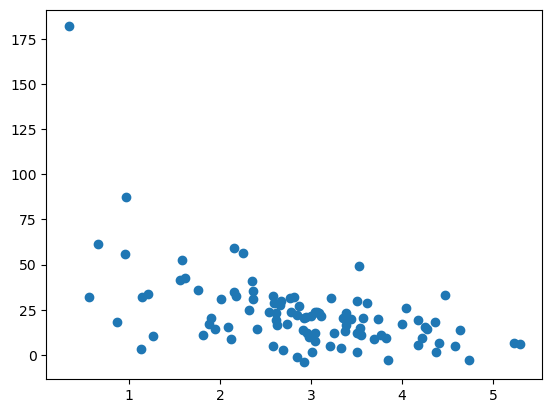

In [53]:
# This line is used in Jupyter Notebooks to display plots inline with the notebook content
%matplotlib inline

# Importing the numpy package for numerical computations
import numpy as np
# Importing all functions from pylab, which is part of matplotlib and mimics MATLAB's plotting commands
from pylab import *

# Setting a seed for the random number generator for reproducibility
np.random.seed(2)

# Generating 100 random values for page speeds from a normal distribution 
# with a mean of 3.0 and a standard deviation of 1.0
pageSpeeds = np.random.normal(3.0, 1.0, 100)
# Generating 100 random values for purchase amounts, also from a normal distribution, and then dividing by page speeds
# to simulate a potential inverse relationship (e.g., slower page might lead to lower purchases)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds

# Creating a scatter plot to visualize the relationship between page speeds and purchase amounts
scatter(pageSpeeds, purchaseAmount)


Now we'll split the data in two - 80% of it will be used for "training" our model, and the other 20% for testing it. This way we can avoid overfitting.

In [54]:
# Split the pageSpeeds array into training data (first 80% of the values)
# and testing data (remaining 20% of the values)
trainX = pageSpeeds[:80]  # Training data for page speeds
testX = pageSpeeds[80:]  # Testing data for page speeds

# Similarly, split the purchaseAmount array based on the same 80/20 split
# to create corresponding training and testing datasets for purchase amounts
trainY = purchaseAmount[:80]  # Training data for purchase amounts
testY = purchaseAmount[80:]  # Testing data for purchase amounts

Here's our training dataset:

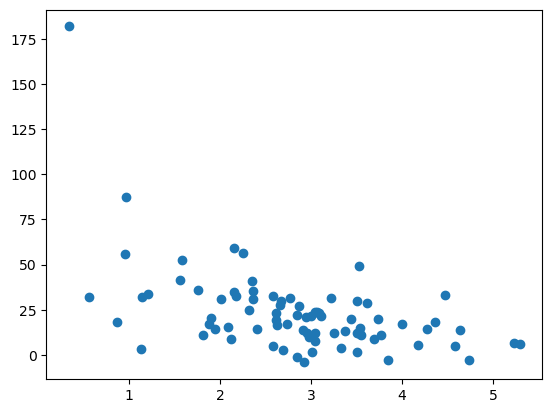

In [55]:
# create a scatter plot of the training data. The trainX data, which represents page speeds,
# will be plotted on the x-axis, and the trainY data, which represents purchase amounts, will be plotted on the y-axis.
scatter(trainX, trainY)

And our test dataset:

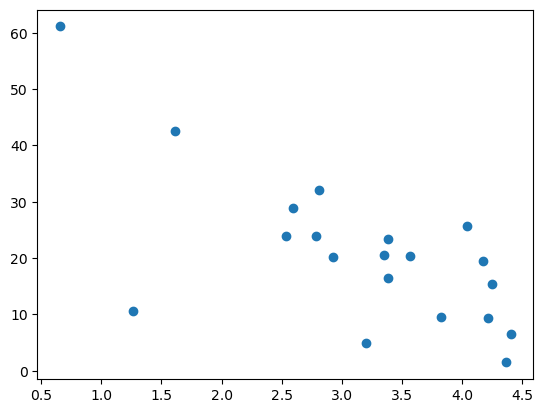

In [56]:
# create a scatter plot of the testing data, where testX (the page speeds for the test dataset) will be on the x-axis
# and testY (the purchase amounts for the test dataset) will be on the y-axis.
# This visualization is typically used to understand the spread of the test data and to visually assess
# the relationship between the two variables in the test set.
scatter(testX, testY)

Now we'll try to fit an 8th-degree polynomial to this data (which is almost certainly overfitting, given what we know about how it was generated!)

In [57]:
# Convert the training data lists into numpy arrays for use with numpy functions
x = np.array(trainX)
y = np.array(trainY)

# Fit a polynomial of degree 4 to the data. This function returns the coefficients of the polynomial
# that minimize the squared error in the order from the highest power to the constant term.
coefficients = np.polyfit(x, y, 4)

# Create a polynomial function using the coefficients obtained from polyfit
# p4 function is used to evaluate the polynomial for any value of `x`
p4 = np.poly1d(coefficients)

Let's plot our polynomial against the training data:

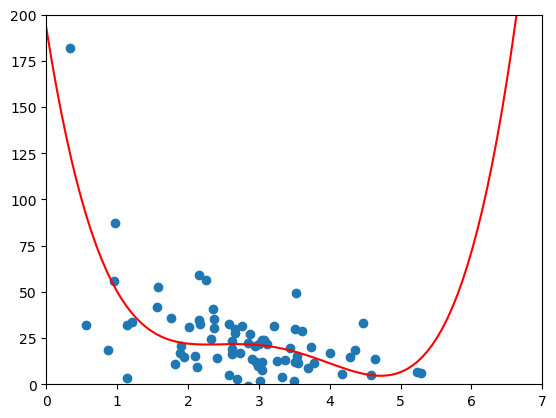

In [58]:
# Import the matplotlib.pyplot module for plotting
import matplotlib.pyplot as plt

# Generate 100 evenly spaced values from 0 to 7 to serve as x-coordinates for plotting the polynomial curve
xp = np.linspace(0, 7, 100)

# Create an 'axes' instance to allow for customization of the plot
axes = plt.axes()

# Set the x-axis limit from 0 to 7
axes.set_xlim([0, 7])

# Set the y-axis limit from 0 to 200
axes.set_ylim([0, 200])

# Create a scatter plot of the training data (page speeds vs purchase amounts)
plt.scatter(x, y)

# Plot the polynomial curve using the values in 'xp' and the polynomial function 'p4'
# The curve is plotted in red (c="r")
plt.plot(xp, p4(xp), c="r")

# Display the plot
plt.show()

And against our test data:

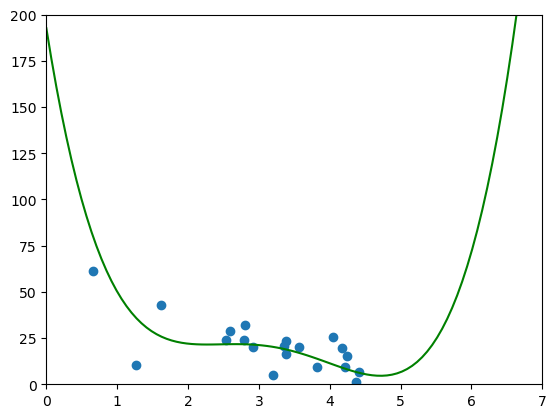

In [59]:
# Convert the test data lists into numpy arrays for use with numpy functions
testx = np.array(testX)
testy = np.array(testY)

# Create an 'axes' instance to allow for customization of the plot
axes = plt.axes()

# Set the x-axis limit from 0 to 7
axes.set_xlim([0, 7])

# Set the y-axis limit from 0 to 200
axes.set_ylim([0, 200])

# Create a scatter plot of the test data (page speeds vs purchase amounts)
plt.scatter(testx, testy)

# Plot the polynomial curve using the values in 'xp' and the polynomial function 'p4'
# The curve is plotted in red (c="r") to distinguish from the test data points
plt.plot(xp, p4(xp), c="g")

# Display the plot
plt.show()

Doesn't look that bad when you just eyeball it, but the r-squared score on the test data is kind of horrible! This tells us that our model isn't all that great...

In [60]:
# Import the r2_score function from sklearn.metrics to calculate the R-squared value
from sklearn.metrics import r2_score

# Calculate the R-squared value by comparing the actual values from the test set (testy)
# and the predicted values from the polynomial model (p4(testx))
r2 = r2_score(testy, p4(testx))

# Print the R-squared value, which indicates how well the model explains the variance of the test data
print(r2)

0.39362692609904626


R-squared is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variable(s) in a regression model.

The R-squared value is a number between 0 and 1, where:

- 0 indicates that the model explains none of the variability of the response data around its mean.
- 1 indicates that the model explains all the variability of the response data around its mean.

In practice, an R-squared value closer to 1 is often considered better, with the caveat that it doesn't always mean the model is the best fit for the data, especially if the model is overly complex.

...even though it fits the training data better:

In [61]:
# Import the r2_score function from sklearn.metrics to calculate the R-squared value
from sklearn.metrics import r2_score

# Calculate the R-squared value by comparing the actual y values from the training set (trainY)
# to the predicted y values generated by the polynomial model (p4) for the training x values (trainX)
r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

# Print the R-squared value, which indicates how well the model explains the variance of the training data
print(r2)

0.4831221655972038


If you're working with a Pandas DataFrame (using tabular, labeled data,) scikit-learn has built-in train_test_split functions to make this easy to do.

Later we'll talk about even more robust forms of train/test, like K-fold cross-validation - where we try out multiple different splits of the data, to make sure we didn't just get lucky with where we split it.

## Activity

Try measuring the error on the test data using different degree polynomial fits. What degree works best?